In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [46]:
items = ["balloon", "bear", "boat", "bowtie", "cake", "car", "duck", "grape", "icecream", "pegasus", "rabbit", "strawberry","tennis", "train", "melon"]
path_image = "data/full.jpg"
path_items = [f"data/{item}.jpg" for item in items]

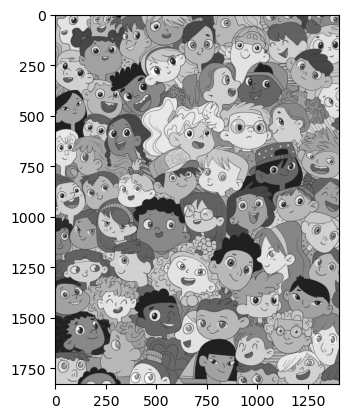

In [45]:
image = cv2.imread(path_image,0)
plt.imshow(image, cmap="gray")

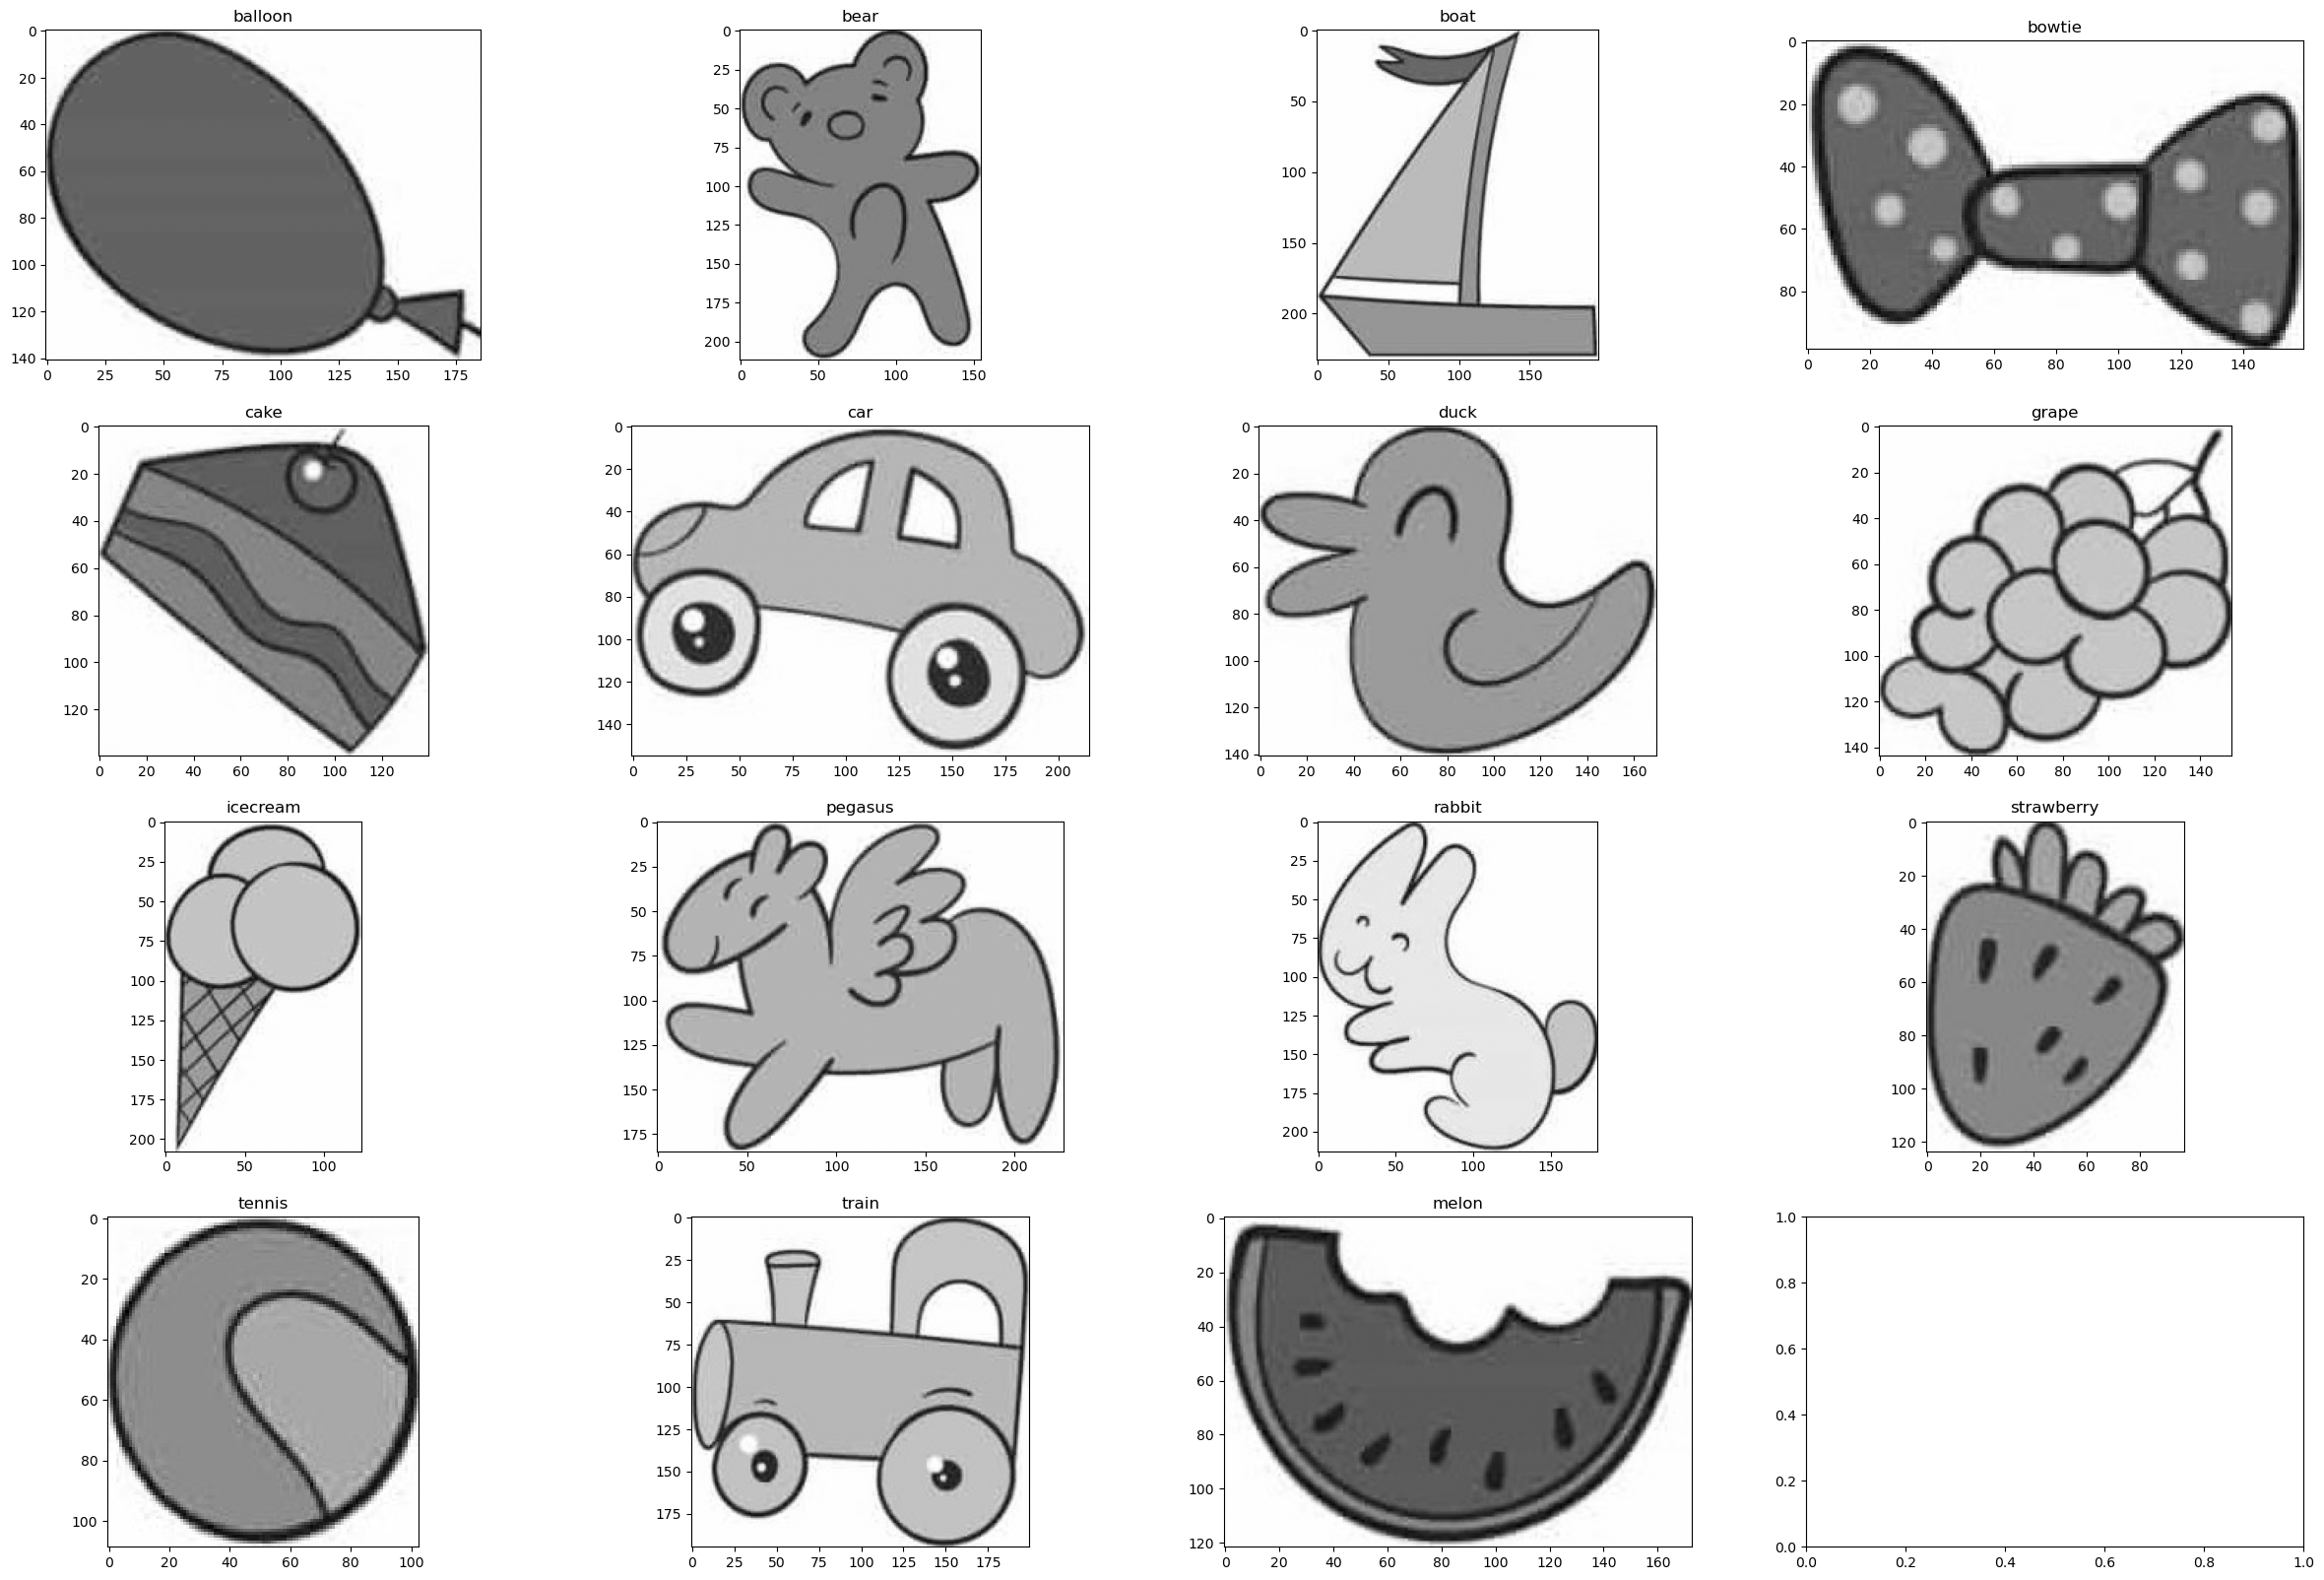

In [44]:
figure, axis = plt.subplots(4, 4, figsize=(30,20))
axis = axis.flatten()
for i, path_item in enumerate(path_items):
    axis[i].set_title(items[i])
    img = cv2.imread(path_item, 0)
    axis[i].imshow(img, cmap="gray")
    
plt.show()

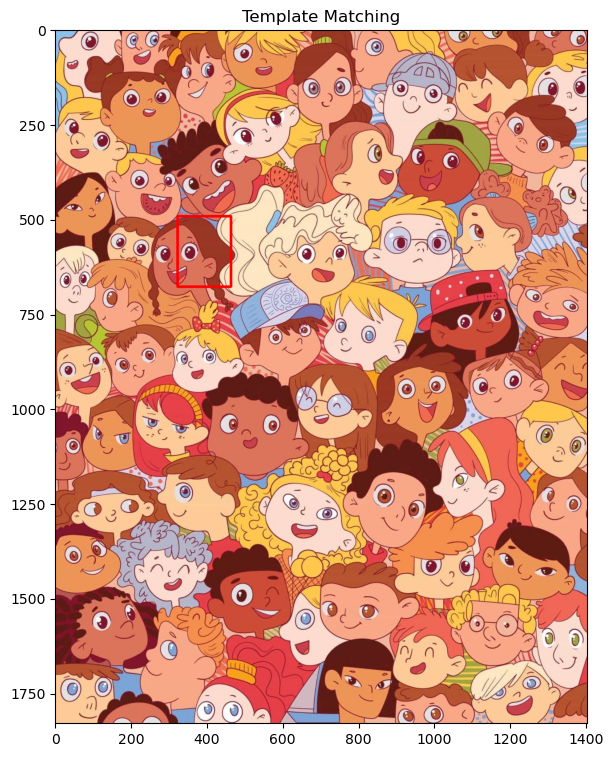

In [50]:
img = cv2.imread(path_items[0], 0)
w, h = img.shape[::1]
result = cv2.imread(path_image)
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

res = cv2.matchTemplate(image, img, cv2.TM_CCOEFF_NORMED)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_l = max_loc  # Điểm góc trên bên trái
bot_r = (top_l[0] + w, top_l[1] + h)

cv2.rectangle(result, top_l, bot_r, (255, 0, 0), thickness=5)

plt.figure(figsize=(12, 9))
plt.imshow(result, cmap='gray')
plt.title('Template Matching')
plt.show()

In [59]:
def find_items(image: np.ndarray,items: list, path_items: list,scales: np.ndarray, 
               threshold=0.7, mask_value=240, res_path=None ,method=cv2.TM_CCORR_NORMED):
    
    box_color = (0, 0, 255)  
    text_color = (255, 0, 0)
    box_thickness = 5
    font_scale = 1.0
    font_thickness = 3

    copy_image = np.copy(image)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    all_res = []

    for path_it, it in zip(path_items, items):
        item = cv2.imread(path_it, 0)
        item_mask = np.where(item < mask_value, 1, 0).astype(np.uint8)

        best_match = None
        best_val = -1

        for scale in scales:
            item_resize = cv2.resize(item, (0,0), fx=scale, fy=scale)
            mask_resize = cv2.resize(item_mask, (0,0), fx=scale, fy=scale)
            # plt.show(item_resize)
            
            w, h = item_resize.shape[::-1]
            # print(f"item_resize shape {item_resize.shape}")
            res = cv2.matchTemplate(gray_image, item_resize, method=method, mask=mask_resize)

            _, max_val, _, max_loc = cv2.minMaxLoc(res)
            # print (best_match , "..." , max_loc)

            if max_val > best_val:
                best_val = max_val
                best_match = (*max_loc, w, h)
        # print(best_match)
        if best_val > threshold and best_match:
            all_res.append((best_match, it))
            print(f"{it} was found!")
        else:
            print(f"{it} was not found!")
    
    print(all_res)
    
    for box, it in all_res:
        x, y, w, h = box
        cv2.rectangle(copy_image, (x, y), (x + w, y + h), box_color, thickness=box_thickness)
        cv2.putText(copy_image, f"{it}", (x, y - 10), cv2.FONT_HERSHEY_COMPLEX, fontScale=font_scale, color=text_color, thickness=font_thickness)
    
    cv2.imwrite(res_path, copy_image)
    
    copy_rgb = cv2.cvtColor(copy_image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 9))
    plt.imshow(copy_rgb)
    plt.axis('off')
    plt.show()

    return all_res
